In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# local
from utils import get_frames, get_labels_df, draw_bboxes, SEQ_01, SEQ_02, SEQ_03

In [ ]:
# Plan of action
# 1 Load images
# 2 match features in left and right images

## Action plan
1. Calibration
   1. Mono calibration
   2. stereo calibration
   3. stereo rectification
2. Feature detection + bboxes
   1. Feature detection (SIFT and other)
   2. feature association to YOLO bboxes
3. Features filtering
   1. Depth estimation
   2. Others (?)
4. 3D Pose estimation of pointcloud of identified object
5. 3D pose tracking
   1. IPC
   2. other(?)
6. inter-timesteps pointcloud association
   1. Kalman Filter
   2. DeepSort

## Others
1. re-trainig YOLOv8 with ciclists

# 2. Feature detection + Bboxes
2.1 Feature detection

In [2]:
# test sequence and frame no.
# select sequence
seq = SEQ_01
frame_num = 0

frame_r, frame_l = get_frames(frame_num, seq) # frames come already in RGB format

labels_df = get_labels_df(seq)

car_df = labels_df[labels_df['type'] == 'Car']
pedestrian_df = labels_df[labels_df['type'] == 'Pedestrian']
cyclist_df = labels_df[labels_df['type'] == 'Cyclist']

# get a specific tracked object's info
track_id = 0
test_df = pedestrian_df[pedestrian_df['track_id'] == track_id]

frames = test_df['frame'].values
world_coords = test_df[['x', 'y', 'z']].values
bbox_coords = test_df[['bbox_left', 'bbox_top', 'bbox_right', 'bbox_bottom']].values

# showing bboxes for object on a given frame 
_fr_num = 10
fr, fl = get_frames(_fr_num, seq)
_bb = bbox_coords[_fr_num]

# plt.imshow(draw_bboxes(fr, _bb))

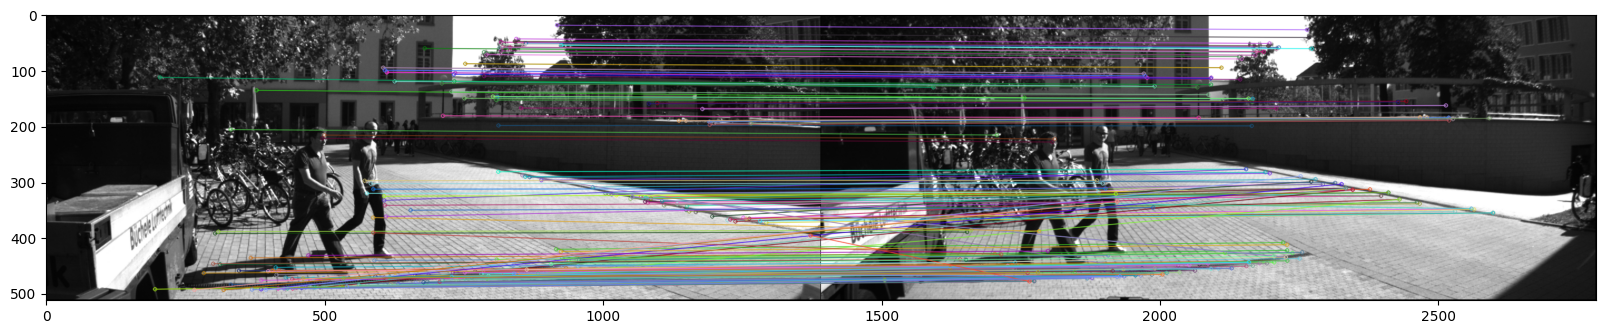

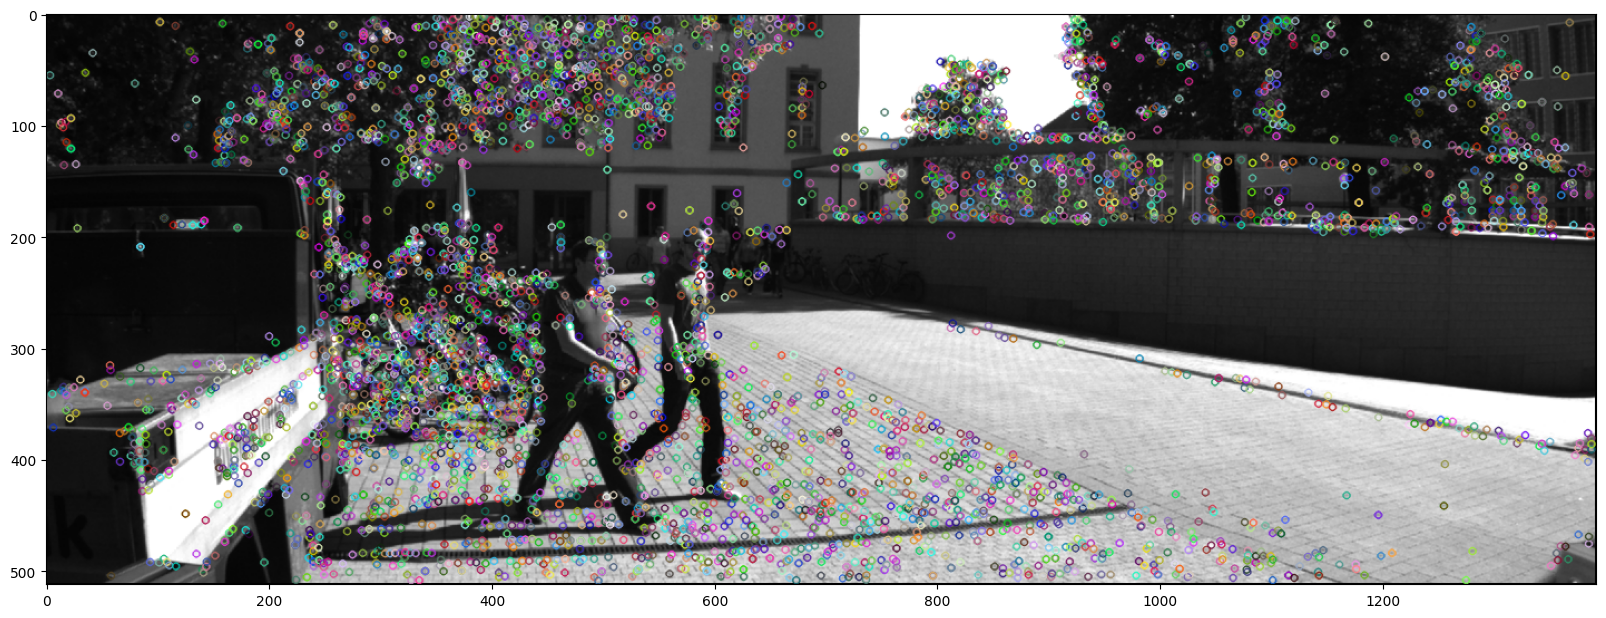

In [4]:
# Detecting features and matching them
# feature detection
gray_r = cv.cvtColor(frame_r,cv.COLOR_RGB2GRAY)
gray_l = cv.cvtColor(frame_l,cv.COLOR_RGB2GRAY)

# match features between right and left frame with sift and brute force matcher
sift = cv.SIFT_create()
bf = cv.BFMatcher()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(gray_r,None)
kp2, des2 = sift.detectAndCompute(gray_l,None)

# match descriptors
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

matched = cv.drawMatches(gray_r,kp1,gray_l,kp2,matches[:200],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize = (20,20))
plt.imshow(matched)

# # draw kp1 on image
img = cv.drawKeypoints(gray_r,kp1,None)
plt.figure(figsize = (20,20))
plt.imshow(img)